In [1]:
import torch
import numpy as np

In [2]:
y = [4.209015  , 6.0251656 , 6.586659  , 1.0785204 , 5.323591,   2.9644287, 8.885769  , 9.895647  ,  6.464806  , 0.18034637, 1.2534696]
x = [34.552039 , 74.45411  , 80.987488 ,  3.458197 , 56.4778655, 26.98163  , 95.79415  , 106.228316 , 61.169422 , 1.089516 , 8.962632]

In [3]:
y = torch.tensor(y)
x = torch.tensor(x)
x

tensor([ 34.5520,  74.4541,  80.9875,   3.4582,  56.4779,  26.9816,  95.7942,
        106.2283,  61.1694,   1.0895,   8.9626])

In [4]:
def model(x, w, b):
    return w * x + b

In [5]:
def loss_fn(yy, y):
    squared_diffs = (yy - y)**2
    return squared_diffs.mean()

In [6]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
params

tensor([1., 0.], requires_grad=True)

In [7]:
params.grad is None

True

In [8]:
loss = loss_fn(model(x, *params), y)
loss.backward()
params.grad

tensor([6852.5474,   90.4160])

In [9]:
if params.grad is not None:
    params.grad.zero_()

In [10]:
def training_loop(n_epochs, learning_rate, params, x, y):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
        yy = model(x, *params)
        loss = loss_fn(yy, y)
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad
        
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
        
    return params

In [11]:
params = training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0], requires_grad=True),
    x = x * 0.1,
    y = y)
params 

Epoch 500, Loss 0.263147
Epoch 1000, Loss 0.262983
Epoch 1500, Loss 0.262982
Epoch 2000, Loss 0.262982
Epoch 2500, Loss 0.262982
Epoch 3000, Loss 0.262982
Epoch 3500, Loss 0.262982
Epoch 4000, Loss 0.262982
Epoch 4500, Loss 0.262982
Epoch 5000, Loss 0.262982


tensor([0.8410, 0.5997], requires_grad=True)

In [12]:
x = x * 0.1
yy = model(x, *params)
yy

tensor([3.5057, 6.8616, 7.4111, 0.8906, 5.3498, 2.8690, 8.6564, 9.5340, 5.7443,
        0.6913, 1.3535], grad_fn=<AddBackward0>)

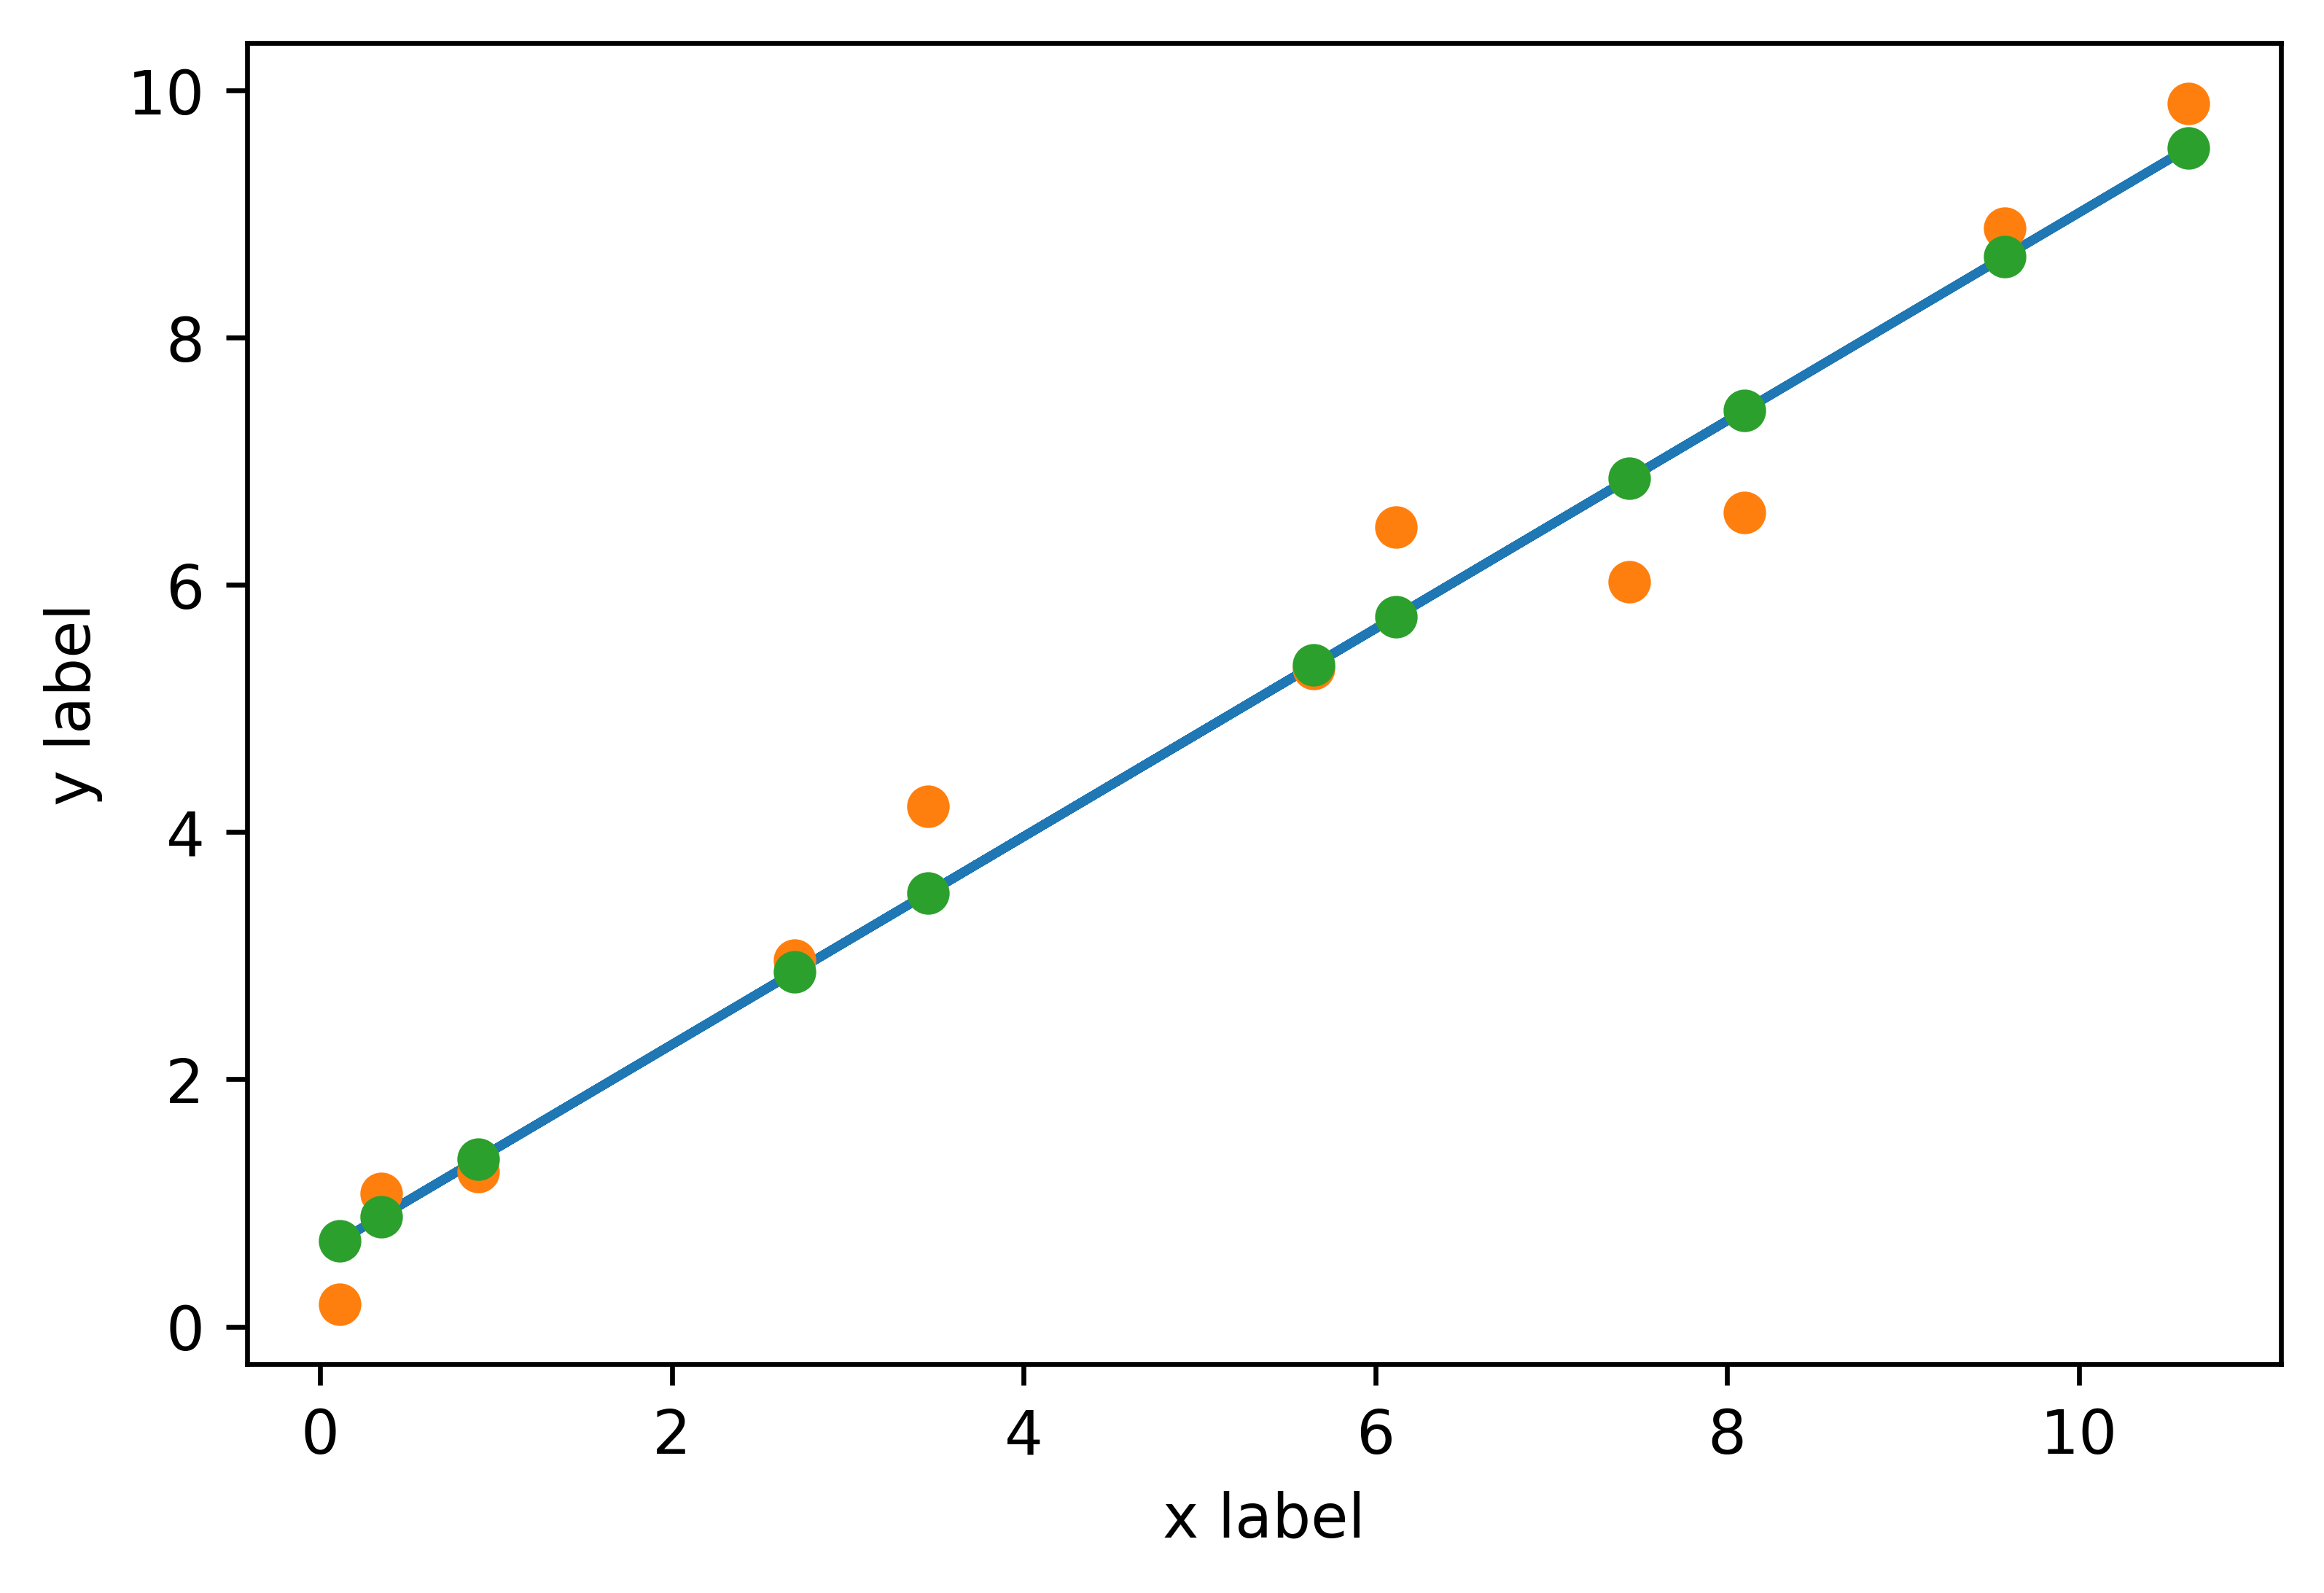

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(dpi=600)
plt.xlabel("x label")
plt.ylabel("y label")
plt.plot(x.numpy(), yy.detach().numpy())
plt.plot(x.numpy(), y.numpy(), 'o')
plt.plot(x.numpy(), yy.detach().numpy(),'o')

plt.savefig("dl_ch1t3_plot01.png", format="png")